In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [3]:
files=glob.glob('/data/esplab/shared/classes/metr3334/class_data/stormevents/StormEvents_details-ftp_v1.0_d*_c*.csv')

In [4]:
storm_list=[]
for lcv in files:
    df=pd.read_csv(lcv, low_memory=False, encoding_errors='ignore')
    storm_list.append(df)
    if lcv == '/data/esplab/shared/classes/metr3334/class_data/stormevents/StormEvents_details-ftp_v1.0_d2010_c20220425.csv':
        break
storms_all=pd.concat(storm_list)

In [5]:
sgp_tor=storms_all.loc[(storms_all['EVENT_TYPE'] == 'Tornado') & (storms_all['BEGIN_LAT'] >29) & (storms_all['BEGIN_LAT'] <40) & (storms_all['BEGIN_LON'] <-95) & (storms_all['BEGIN_LON'] >-105)]
ngp_tor=storms_all.loc[(storms_all['EVENT_TYPE'] == 'Tornado') & (storms_all['BEGIN_LAT'] >40) & (storms_all['BEGIN_LAT'] <49) & (storms_all['BEGIN_LON'] <-90) & (storms_all['BEGIN_LON'] >-105)]
se_tor=storms_all.loc[(storms_all['EVENT_TYPE'] == 'Tornado') & (storms_all['BEGIN_LAT'] >30) & (storms_all['BEGIN_LAT'] <40) & (storms_all['BEGIN_LON'] <-80) & (storms_all['BEGIN_LON'] >-95)]

In [8]:
def yaverage(count):
    return count/61

In [33]:
sgp_small=sgp_tor[['EVENT_TYPE','MONTH_NAME']]
sgp_month=sgp_small.groupby('MONTH_NAME').count()
sgp_month=sgp_month.reindex(index=['January', 'February', 'March','April','May','June','July','August','September','October','November','December'])
sgp_month['EVENT_TYPE']=sgp_month['EVENT_TYPE'].apply(yaverage)
sgp_month['MONTH_NAME2']=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

ngp_small=ngp_tor[['EVENT_TYPE','MONTH_NAME']]
ngp_month=ngp_small.groupby('MONTH_NAME').count()
ngp_month=ngp_month.reindex(index=['January', 'February', 'March','April','May','June','July','August','September','October','November','December'])
ngp_month['EVENT_TYPE']=ngp_month['EVENT_TYPE'].apply(yaverage)
ngp_month['MONTH_NAME2']=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

se_small=se_tor[['EVENT_TYPE','MONTH_NAME']]
se_month=se_small.groupby('MONTH_NAME').count()
se_month=se_month.reindex(index=['January', 'February', 'March','April','May','June','July','August','September','October','November','December'])
se_month['EVENT_TYPE']=se_month['EVENT_TYPE'].apply(yaverage)
se_month['MONTH_NAME2']=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

/tmp/ipykernel_231023/1562628893.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_month['MONTH_NAME2'][0]
/tmp/ipykernel_231023/1562628893.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(se_month['MONTH_NAME2'][0], se_month['MONTH_NAME2'][11])


(0.0, 11.0)

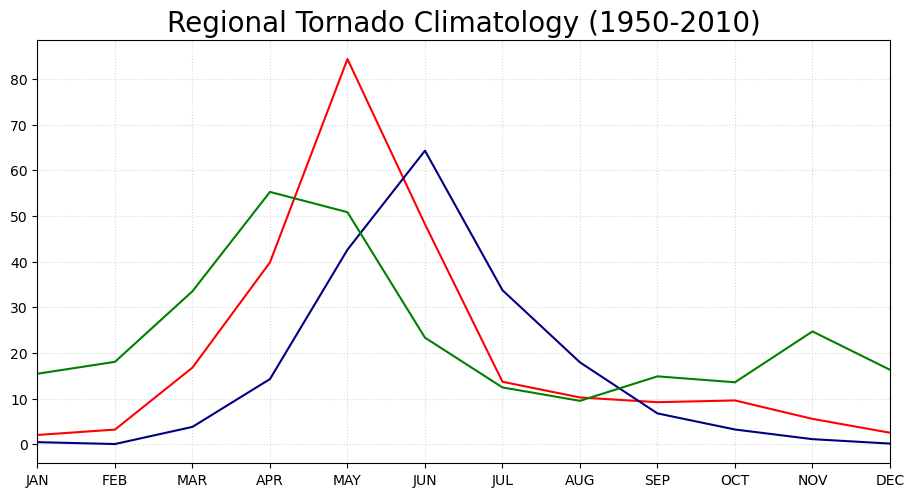

In [129]:
fig1 = plt.figure(figsize=(11,5.5))
plt.figure(1)
plt.plot(sgp_month['MONTH_NAME2'],sgp_month['EVENT_TYPE'],color='red')
plt.plot(ngp_month['MONTH_NAME2'],ngp_month['EVENT_TYPE'],color='navy')
plt.plot(se_month['MONTH_NAME2'],se_month['EVENT_TYPE'],color='green')
plt.title('Regional Tornado Climatology (1950-2010)',size=20)
plt.yticks([0,10,20,30,40,50,60,70,80])
plt.grid(linestyle='dotted',alpha=.5)
se_month['MONTH_NAME2'][0]
plt.xlim(se_month['MONTH_NAME2'][0], se_month['MONTH_NAME2'][11])

Text(0.5, 1.0, 'Tornado Regions')

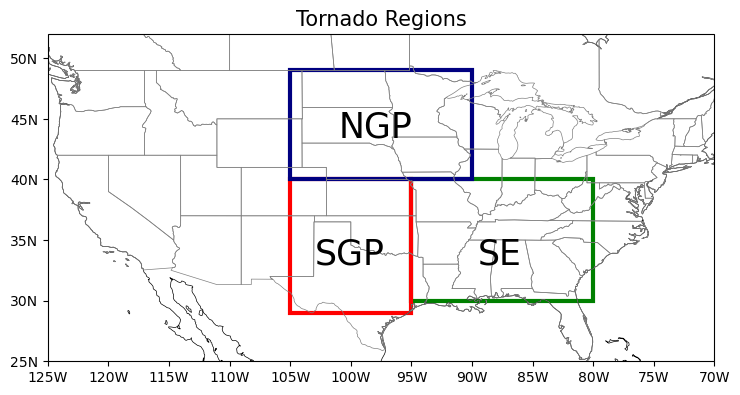

In [125]:
import cartopy.crs as ccrs
import cartopy.mpl.ticker as sticker
import matplotlib.patches as mpatches
fig2 = plt.figure(figsize=(11,4.25))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -70, 25, 52], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(-125,-69.99,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter(degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(25,50.01,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter(degree_symbol='')
ax.yaxis.set_major_formatter(lat_formatter)
ax.coastlines(edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=.5)

ax.add_patch(mpatches.Rectangle(xy=[-95, 30], width=15, height=10,
                                facecolor='none', edgecolor='green',linewidth=3,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-105, 29], width=10, height=11,
                                facecolor='none', edgecolor='red',linewidth=3,
                                transform=ccrs.PlateCarree()))
ax.add_patch(mpatches.Rectangle(xy=[-105, 40], width=15, height=9,
                                facecolor='none', edgecolor='navy',linewidth=3,
                                transform=ccrs.PlateCarree()))

ax.text(-101,43.5,'NGP',transform=ccrs.PlateCarree(),size=25)
ax.text(-103,33,'SGP',transform=ccrs.PlateCarree(),size=25)
ax.text(-89.5,33,'SE',transform=ccrs.PlateCarree(),size=25)


plt.title('Tornado Regions',size=15)